In [4]:
from pathlib import Path
from src.dataloaders.brats import BRATS
from src.utils import get_device, IoU, IoU2
import torch
import numpy as np
import matplotlib.pyplot as plt


def custom_sort_key(filename):
    filename_str = str(filename)
    num_e = int(filename_str.split("_e")[1].split("_b")[0])
    num_b = int(filename_str.split("_b")[1].split(".")[0])
    return num_e, num_b

def is_binary_image(image_array):
    unique_values = np.unique(image_array)
    if len(unique_values) <= 2:
        return 'Binary'
    else:
        return 'Not Binary'

path = Path("../../../results/res-dulcet-plasma-25") # baseline

img = sorted(list(path.glob("img" + "/*")), key=custom_sort_key)
target = sorted(list(path.glob("target" + "/*")), key=custom_sort_key)
pred = sorted(list(path.glob("pred" + "/*")), key=custom_sort_key)
loaded_model = path.glob("/.pth")

print(len(img), len(target), len(pred), type(loaded_model))

634 0 1600 <class 'generator'>


Using mps
iou - tp=0 fp=0 fn=324 iou1=3.08641975299116e-11 iou2=0.0
iou - tp=0 fp=0 fn=324 iou1=3.08641975299116e-11 iou2=0.0
----- 3 cur_iou1 3.08641975299116e-11 train_iou1 3.08641975299116e-11 cur_iou2 0.0 train_iou2 0.0
tar sum 324.0 Binary min 0.0 max 1.0
pred1 sum -5878057.5 Not Binary min -304.3223 max -1.3012357
pred2 sum 6.76752 Not Binary min 0.0 max 0.21395712
pred3 sum 0 Binary min False max False
match sum 0 Binary min 0 max 0


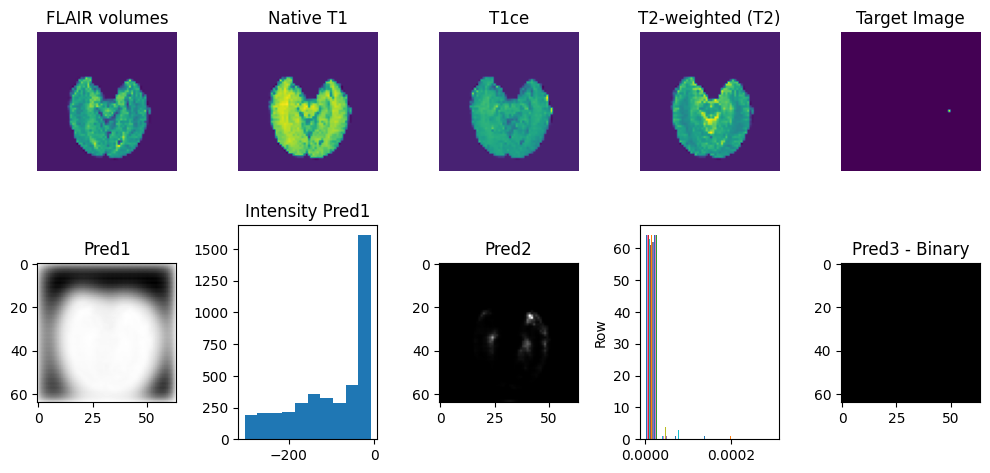

iou - tp=0 fp=0 fn=651 iou1=1.536098310268263e-11 iou2=0.0
iou - tp=0 fp=0 fn=651 iou1=1.536098310268263e-11 iou2=0.0
----- 4 cur_iou1 1.536098310268263e-11 train_iou1 4.622518063259423e-11 cur_iou2 0.0 train_iou2 0.0
tar sum 651.0 Binary min 0.0 max 1.0
pred1 sum -4866391.5 Not Binary min -274.1454 max -0.1588285
pred2 sum 28.85765 Not Binary min 0.0 max 0.46037617
pred3 sum 0 Binary min False max False
match sum 0 Binary min 0 max 0
iou - tp=231 fp=0 fn=1319 iou1=0.14903225807000625 iou2=0.14903225806355463
iou - tp=231 fp=0 fn=1319 iou1=0.14903225807000625 iou2=0.14903225806355463
----- 5 cur_iou1 0.14903225807000625 train_iou1 0.14903225811623144 cur_iou2 0.14903225806355463 train_iou2 0.14903225806355463
tar sum 1550.0 Binary min 0.0 max 1.0
pred1 sum -5252672.5 Not Binary min -265.51233 max 1.6843569
pred2 sum 268.36646 Not Binary min 0.0 max 0.84348065
pred3 sum 231 Binary min False max True
match sum 164 Binary min 0 max 1
iou - tp=158 fp=0 fn=1227 iou1=0.11407942238906803 iou2

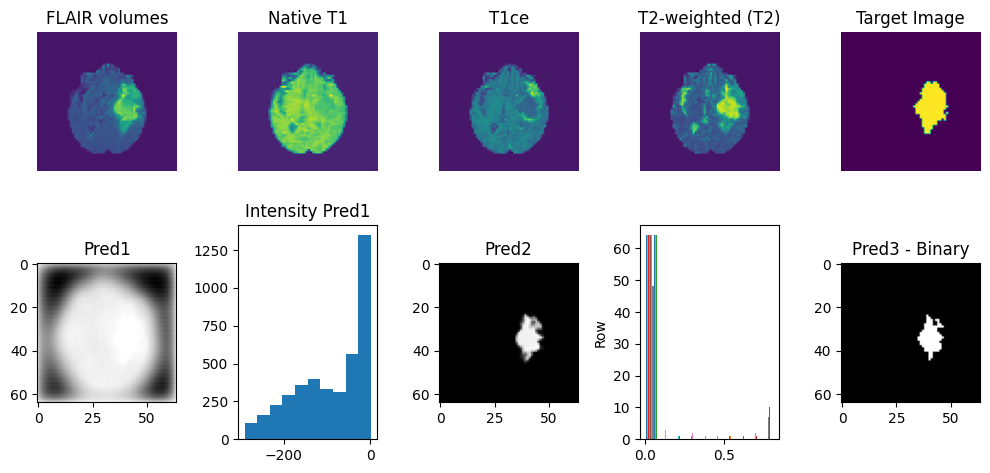

iou - tp=968 fp=0 fn=1351 iou1=0.4174213022879801 iou2=0.41742130228366786
iou - tp=968 fp=0 fn=1351 iou1=0.4174213022879801 iou2=0.41742130228366786
----- 131 cur_iou1 0.4174213022879801 train_iou1 15.847231759769075 cur_iou2 0.41742130228366786 train_iou2 15.847231754142207
tar sum 2319.0 Binary min 0.0 max 1.0
pred1 sum -6072109.0 Not Binary min -274.97076 max 1.5287933
pred2 sum 910.8408 Not Binary min 0.0 max 0.8218297
pred3 sum 968 Binary min False max True
match sum 764 Binary min 0 max 1
iou - tp=4 fp=0 fn=125 iou1=0.031007752013100173 iou2=0.031007751935580793
iou - tp=4 fp=0 fn=125 iou1=0.031007752013100173 iou2=0.031007751935580793
----- 132 cur_iou1 0.031007752013100173 train_iou1 15.878239511782175 cur_iou2 0.031007751935580793 train_iou2 15.878239506077788
tar sum 129.0 Binary min 0.0 max 1.0
pred1 sum -7278496.5 Not Binary min -305.4745 max 0.24019963
pred2 sum 18.38787 Not Binary min 0.0 max 0.55976284
pred3 sum 4 Binary min False max True
match sum 0 Binary min 0 max 0

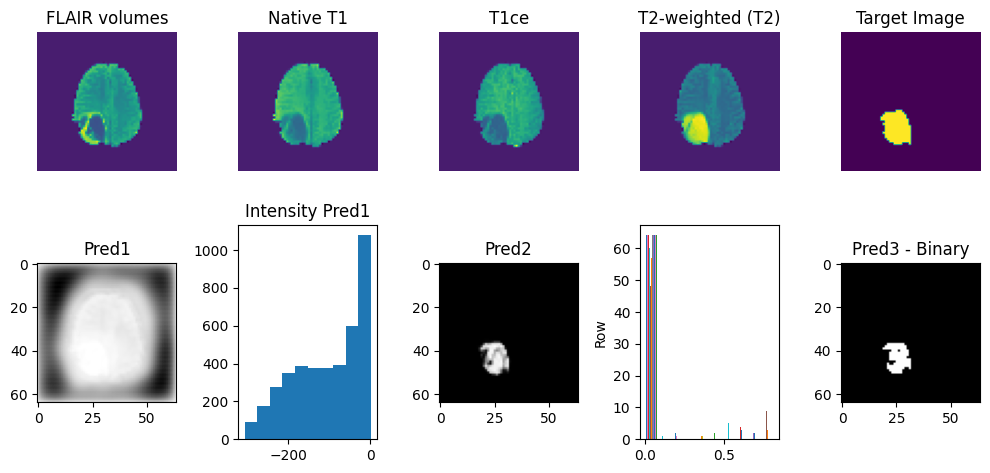

iou - tp=0 fp=0 fn=122 iou1=8.196721310803548e-11 iou2=0.0
iou - tp=0 fp=0 fn=122 iou1=8.196721310803548e-11 iou2=0.0
----- 221 cur_iou1 8.196721310803548e-11 train_iou1 29.08346961996389 cur_iou2 0.0 train_iou2 29.083469604400157
tar sum 122.0 Binary min 0.0 max 1.0
pred1 sum -12391885.0 Not Binary min -388.8552 max -3.7999716
pred2 sum 0.37978175 Not Binary min 0.0 max 0.02188188
pred3 sum 0 Binary min False max False
match sum 0 Binary min 0 max 0
iou - tp=0 fp=0 fn=9 iou1=1.1111111098765432e-09 iou2=0.0
iou - tp=0 fp=0 fn=9 iou1=1.1111111098765432e-09 iou2=0.0
----- 226 cur_iou1 1.1111111098765432e-09 train_iou1 29.083469621075 cur_iou2 0.0 train_iou2 29.083469604400157
iou - tp=39 fp=0 fn=620 iou1=0.05918057664553596 iou2=0.05918057663036145
iou - tp=39 fp=0 fn=620 iou1=0.05918057664553596 iou2=0.05918057663036145
----- 227 cur_iou1 0.05918057664553596 train_iou1 29.142650197720535 cur_iou2 0.05918057663036145 train_iou2 29.14265018103052
tar sum 659.0 Binary min 0.0 max 1.0
pred1

TypeError: only integer scalar arrays can be converted to a scalar index

In [28]:
from src.models.unet import UNet
from src.models.unet_dropout import UNet as UNetDropout
from src.models.ensemble import UNet as Ensemble

valid_set = BRATS('../../../../special-course/data/MICCAI_BraTS_2018_Data_Training', mode='val', subset=0.6, size=[64, 64, 155])
valid_dataloader = torch.utils.data.DataLoader(valid_set, batch_size=16, shuffle=False, drop_last=False)
device = get_device()
model = UNet('test-iou')
# model = UNetDropout()
# model = Ensemble('ensemble', 3)

# model.load_state_dict(torch.load('../../../results/res-star-force-42/trained_model.pth')) # baseline +
# model.load_state_dict(torch.load('../../../results/res-galactic-wookie-41/trained_model.pth')) # dropout +
# model.load_state_dict(torch.load('../../../results/res-elegant-tie-fighter-44/models/model_55.pth')) # affine +
# model.load_state_dict(torch.load('../../../results/res-jedi-destroyer-45/models/model_63.pth')) # elastic +
# model.load_state_dict(torch.load('../../../results/res-light-bothan-43/trained_model.pth')) # dropout + affine +
# model.load_state_dict(torch.load('../../../results/res-solar-dust-36/model_ep50.pth')) # dropout + elastic
model.load_state_dict(torch.load('../../../results/res-noble-shape-49/trained_model.pth')) # early drop baseline
# model.load_state_dict(torch.load('../../../results/res-logical-dream-100/trained_model.pth')) # early drop dropout
# model.load_state_dict(torch.load('../../../results/res-wandering-haze-92/trained_model.pth')) # early drop elastic
# model.load_state_dict(torch.load('../../../results/res-zesty-glade-90/trained_model.pth')) # early drop elastic+dropout

train_loss = 0.0
train_iou1 = 0.0
train_iou2 = 0.0
iou_arr = []
for index, (inputs, targets, _) in enumerate(valid_dataloader):
        # inputs, targets = inputs.to(device), targets.to(device)
        np_tar = targets.detach().numpy()
        if np_tar.sum() <= 0.0:
            iou_arr.append(np.NAN)
            continue
        logits = model(inputs)
        criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor(0.0093))
        loss = criterion(logits, targets)
        train_loss += float(loss)
        cur_iou1 = float(IoU(targets.detach(), torch.sigmoid(logits.detach()).ge(0.5)))
        cur_iou2 = float(IoU2(targets.detach(), torch.sigmoid(logits.detach()).ge(0.5)))
        train_iou1 += cur_iou1
        train_iou2 += cur_iou2
        iou_arr.append(train_iou1)
        np_img = inputs.detach().numpy()

        np_pred1 = logits.detach().numpy()
        np_pred2 = torch.sigmoid(logits.detach()).cpu().numpy()
        np_pred3 = torch.sigmoid(logits.detach()).ge(0.5).cpu().detach().numpy()

        matched_pixels = np.where((np_tar > 0) & (np_pred1 > 0.5), 1, 0)

        print('-----', index, 'cur_iou1', cur_iou1, 'train_iou1', train_iou1,
                              'cur_iou2', cur_iou2, 'train_iou2', train_iou2)
        if np_tar.sum() < 10.0:
            continue

        print('tar', 'sum', np_tar.sum(), is_binary_image(np_tar), 'min', np_tar.min(), 'max', np_tar.max())
        print('pred1', 'sum', np_pred1.sum(), is_binary_image(np_pred1), 'min', np_pred1.min(), 'max', np_pred1.max())
        print('pred2', 'sum', np_pred2.sum(), is_binary_image(np_pred2), 'min', np_pred2.min(), 'max', np_pred2.max())
        print('pred3', 'sum', np_pred3.sum(), is_binary_image(np_pred3), 'min', np_pred3.min(), 'max', np_pred3.max())
        print('match', 'sum', matched_pixels.sum(), is_binary_image(matched_pixels), 'min', matched_pixels.min(), 'max', matched_pixels.max())

        if index == 3 or index == 130 or index == 220:
            fig, axes = plt.subplots(2, 5, figsize=(10, 5))

            axes[0][0].imshow(np_img[0, 0, :, :])
            axes[0][0].set_title('FLAIR volumes')
            axes[0][0].axis('off')

            axes[0][1].imshow(np_img[0, 1, :, :])
            axes[0][1].set_title('Native T1')
            axes[0][1].axis('off')

            axes[0][2].imshow(np_img[0, 2, :, :])
            axes[0][2].set_title('T1ce')
            axes[0][2].axis('off')

            axes[0][3].imshow(np_img[0, 3, :, :])
            axes[0][3].set_title('T2-weighted (T2)')
            axes[0][3].axis('off')

            axes[0][4].imshow(np_tar[0, 0, :, :])#, cmap='binary')
            axes[0][4].set_title('Target Image')
            axes[0][4].axis('off')

            axes[1][0].imshow(np_pred1[0, 0, :, :], cmap='gray')
            axes[1][0].set_title('Pred1')

            axes[1][1].hist(np_pred1[0, 0, :, :].flatten())
            axes[1][1].set_title('Intensity Pred1')

            axes[1][2].imshow(np_pred2[0, 0, :, :], cmap='gray')
            axes[1][2].set_title('Pred2')

            axes[1][3].hist(np_pred2[0, 0, :, :])
            axes[1][3].set_ylabel('Row')

            axes[1][4].imshow(np_pred3[0, 0, :, :], cmap='gray')
            axes[1][4].set_title('Pred3 - Binary')

            plt.tight_layout()
            plt.show()

nan_mask = np.isnan(iou_arr)
iou_arr = iou_arr[~nan_mask]

print("Array without NaN values:", iou_arr)
print('IOU array', len(iou_arr))
print('Final IOU1', train_iou1, train_iou1/len(iou_arr))
print('Final IOU2', train_iou2, train_iou2/len(iou_arr))


0.5384870848708487